In [23]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')  
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
conn = sqlite3.connect('netflix.db')
df.to_sql('netflix', conn, if_exists='replace', index=False)
conn.commit()

In [25]:
#ეს ბრძანება ბაზიდან გვიჩვენებს ისეთი ფილმების სათაურს, ტიპს და გამოშვების წელს, 
#რომლების ტიპია "Movie" და 2015 წლის შემდეგაა გამოშვებული
cursor = conn.cursor()
cursor.execute("SELECT title, type, release_year FROM netflix WHERE type = 'Movie' AND release_year > 2015")
rows = cursor.fetchall()
for row in rows[:5]:
    print(row)

('Dick Johnson Is Dead', 'Movie', 2020)
('My Little Pony: A New Generation', 'Movie', 2021)
('The Starling', 'Movie', 2021)
('Je Suis Karl', 'Movie', 2021)
('Confessions of an Invisible Girl', 'Movie', 2021)


In [26]:
#ბრძანების მეშვეობით მომხმარებელს შემოაქვს ფილმის სახელი, ტიპი, გამოშვების წელი, რეიტინგი, შემდეგ კი ეს ინფორმაცია ემატება ბაზაში.

your_title = input('შეიყვანეთ თქვენთვის სასურველი სათაური')
your_type = input("შეიყვანეთ ტიპი 'Movie' ან 'TV show'")
your_release_year = input("შეიყვანეთ გამოშვების წელი")
your_rating = input("შეიყვანეთ რეიტინგი")
cursor.execute("INSERT INTO netflix (title, type, release_year, rating) VALUES (?, ?, ?, ?)", (your_title, your_type, your_release_year, your_rating))
conn.commit()
print("ჩანაწერი წარმატებით დაემატა ბაზაში!")

ჩანაწერი წარმატებით დაემატა ბაზაში!


In [27]:
#ბრძანება სერიალს 'Blood & Water' უცვლის რეიტინგს
new_rating = input("შემოიტანეთ განახლებული რეიტინგი")

cursor.execute("UPDATE netflix SET rating = ? WHERE title = ?", ('new_rating', 'Blood & Water'))
conn.commit()
print('სერიალის რეიტინგი განახლებულია')

სერიალის რეიტინგი განახლებულია


In [28]:
#ბრძანება შლის მომხმარებლის მიერ შემოტანილ ფილმს და მის ინფორმაციას
cursor.execute("DELETE FROM netflix WHERE title = ?", ('your_title',))
conn.commit()

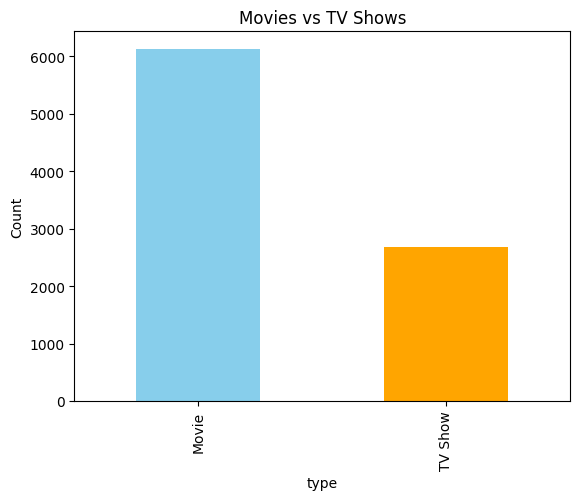

In [29]:
#დიაგრამის სახით ფილმებისა და სერიალების რაოდენობას გვიჩვენებს
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Movies vs TV Shows')
plt.ylabel('Count')
plt.show()

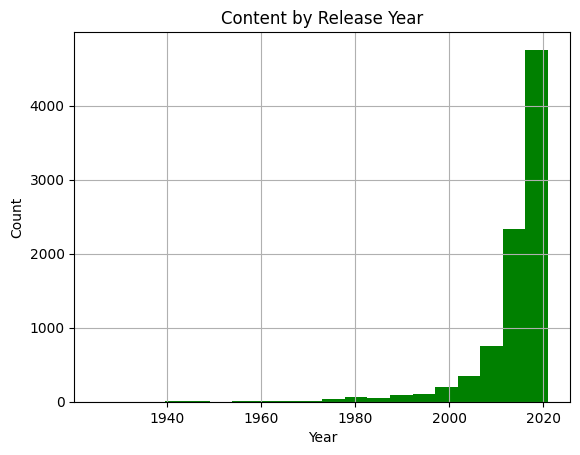

In [30]:
#ფილმების რაოდენობა გამოშვების წლების მიხედვით
df['release_year'].hist(bins=20, color='green')
plt.title('Content by Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

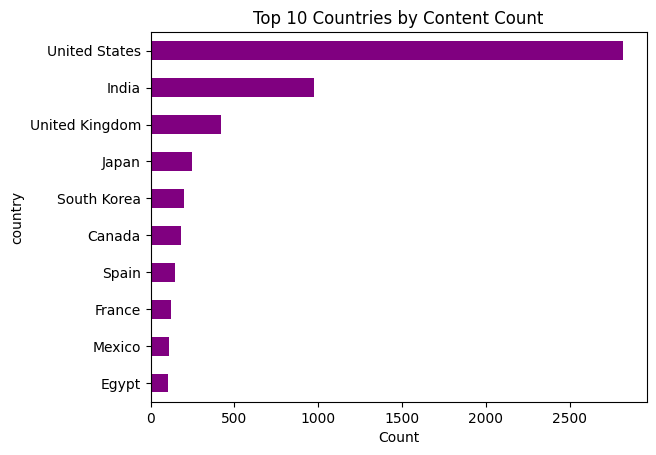

In [31]:
#ფილმების რაოდენობა ქვეყნების მიხედვით
df['country'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

In [32]:
cursor.close()
conn.close()